# Data cleaning and Preprocessing - BMW_PRICING



In [105]:
#Conect my colab with  google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder


### 1. Data Structure

In [107]:
df_bmw=pd.read_csv('/content/bmw_pricing_v3(1).csv')

In [108]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [109]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [110]:
df_bmw.describe(include='all')

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
count,3873,4840,4.841000e+03,4842.000000,2420,4838,4398,3383,4839,4357,4841,1452,4841,4115,4843,4115,4837.000000,4842
unique,1,76,NaN,NaN,180,5,10,8,2,2,2,2,2,2,2,2,NaN,13
top,BMW,320,NaN,NaN,2013-07-01,diesel,black,estate,True,True,False,False,False,False,True,True,NaN,2018-05-01
freq,3873,752,NaN,NaN,93,4631,1499,1107,2662,3465,3864,1150,2612,3119,4514,2240,NaN,809
mean,NaN,NaN,1.409593e+05,128.981826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15831.920612,NaN
std,NaN,NaN,6.020853e+04,38.994839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9222.630708,NaN
min,NaN,NaN,-6.400000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
25%,NaN,NaN,1.028840e+05,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10800.000000,NaN
50%,NaN,NaN,1.410800e+05,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14200.000000,NaN
75%,NaN,NaN,1.752170e+05,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18600.000000,NaN


In [111]:
df_bmw.shape

(4843, 18)

In [112]:
df_bmw.isnull().sum()

,0
marca,970
modelo,3
km,2
potencia,1
fecha_registro,2423
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486


### 2. Data Cleaning
* Delete duplicate records
* Delete rows without target reported
* Remove irrelevant columns
* Correct literal mistakes
* Correct data types
* Remove outliers

In [113]:
#Check duplicated reg
df_bmw.duplicated().sum()

np.int64(0)

In [114]:
#Check reg without target informed
df_bmw['precio'].isnull().sum()

np.int64(6)

In [115]:
#Delete reg without target informed
df_bmw.dropna(subset='precio', inplace=True)

In [116]:
#Delete the column 'Marca'
del(df_bmw['marca'])

In [117]:
# Delete the column 'Asientos_plegables_traseros' % of nulls very high
del(df_bmw['asientos_traseros_plegables'])

In [118]:
#Correct literal mistakes
for i in df_bmw:
  print(i, df_bmw[i].unique(), '\n')

modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 nan '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3'
 'M550' '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé'
 'i3' '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 

km [140411.  13929. 183297. ...  19633.  27920. 195840.] 

potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210.  nan 122. 200.
  90. 150. 141. 173. 137. 280. 112. 189

In [119]:
# Unify the records from Diesel and petrol to diesel
df_bmw['tipo_gasolina']=df_bmw['tipo_gasolina'].replace('Diesel', 'diesel')

# Create a new category to group the hybrid petrol and electro cars
df_bmw['tipo_gasolina']=df_bmw['tipo_gasolina'].replace('hybrid_petrol', 'otro')
df_bmw['tipo_gasolina']=df_bmw['tipo_gasolina'].replace('electro', 'otro')

In [120]:
# Unify those records from gps where the value is ' True'
df_bmw['gps']=df_bmw['gps'].replace(' True', 'True')

# Change data type bool to object in gps to be unify with the others columns
df_bmw['gps'] = df_bmw['gps'].astype('object')

In [121]:
# Group those car model with less tan 1% of records associated

# Get the count of each car model
model_counts = df_bmw['modelo'].value_counts()

# Get the total number of cars
total_cars = df_bmw.shape[0]

# Calculate the percentage of cars with each model
percentages = model_counts / total_cars * 100

# Create a new DataFrame with the car models, their counts, and their percentages
model_counts_percent = pd.DataFrame({'modelo': model_counts.index, 'count': model_counts, 'percentage': percentages})

# Calculate the accumulated percentage
model_counts_percent['acc_percentage'] = model_counts_percent['percentage'].cumsum()

In [122]:
def group_models(df, model_column, threshold=0.01):
    """
    Agrupa los modelos que tengan menos del 1% de registros asociados en la columna 'modelo'
    """
    # Contar la cantidad de registros por modelo
    model_counts = df[model_column].value_counts(normalize=True)

    # Identificar los modelos que tengan menos del 1% de registros asociados
    low_count_models = model_counts[model_counts < threshold].index

    # Sobreescribir los modelos con menos del 1% de registros asociados con 'otros'
    df[model_column] = df[model_column].apply(lambda x: 'otros' if x in low_count_models else x)

    return df

In [123]:
df_bmw = group_models(df_bmw, 'modelo')
df_bmw['modelo'].unique()

array(['118', 'otros', '320', '318', '316', '520', nan, '525', '530',
       '320 Gran Turismo', '518', '116', 'X3', '318 Gran Turismo', 'X5',
       'X1'], dtype=object)

In [124]:
df_bmw['modelo'].value_counts()

,count
modelo,
320,750
520,632
otros,630
318,567
X3,438
116,358
X1,274
316,234
X5,231


In [125]:
# Transform the date column from object to datetime
df_bmw['fecha_registro']=pd.to_datetime(df_bmw['fecha_registro'])
df_bmw['fecha_venta']=pd.to_datetime(df_bmw['fecha_venta'])

In [126]:
#Create rows for the years of sale.
#also create a new column called 'dias_en_posesion' to determine the age of the car.
df_bmw['year_venta']=df_bmw['fecha_venta'].dt.year
df_bmw['year_registro']=df_bmw['fecha_registro'].dt.year
df_bmw['dias_en_posesion'] = (df_bmw['fecha_venta'] - df_bmw['fecha_registro']).dt.days

In [127]:
df_bmw['year_venta'].value_counts()

,count
year_venta,
2018.0,4832
2007.0,1
2010.0,1
2009.0,1
2008.0,1


In [128]:
#Now Im able to delete 'fecha_registro', 'fecha_venta' and 'year_venta' because the year of sale for the most cars is 2018
del(df_bmw['fecha_registro'])
del(df_bmw['fecha_venta'])
del(df_bmw['year_venta'])

In [129]:
#Check datatype
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4834 non-null   object 
 1   km                    4835 non-null   float64
 2   potencia              4836 non-null   float64
 3   tipo_gasolina         4832 non-null   object 
 4   color                 4393 non-null   object 
 5   tipo_coche            3379 non-null   object 
 6   volante_regulable     4833 non-null   object 
 7   aire_acondicionado    4352 non-null   object 
 8   camara_trasera        4835 non-null   object 
 9   elevalunas_electrico  4835 non-null   object 
 10  bluetooth             4109 non-null   object 
 11  gps                   4837 non-null   object 
 12  alerta_lim_velocidad  4109 non-null   object 
 13  precio                4837 non-null   float64
 14  year_registro         2419 non-null   float64
 15  dias_en_posesion      2419

### 3. EDA: Variable distribution

In [130]:
target=['precio']

def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]

  for i in dataset:
    if (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2 and i not in target:
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind in ("f","i", "O")) and (len(dataset[i].dropna().unique())== 2) and i not in target:
      lista_boolean.append(i)
    elif (dataset[i].dtype.kind == "O") and i not in target:
      lista_categoricas.append(i)
  return lista_numericas, lista_boolean, lista_categoricas

In [131]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw)
lista_numericas, lista_boolean, lista_categoricas

(['km', 'potencia', 'year_registro', 'dias_en_posesion'],
 ['volante_regulable',
  'aire_acondicionado',
  'camara_trasera',
  'elevalunas_electrico',
  'bluetooth',
  'gps',
  'alerta_lim_velocidad'],
 ['modelo', 'tipo_gasolina', 'color', 'tipo_coche'])

In [132]:
print(len(df_bmw.columns), "total number of variables")
print(len(target), "variable to predict")
print(len(lista_categoricas), "categorical variables")
print(len(lista_boolean), "boolean variables")
print(len(lista_numericas), "numeric variables")

16 total number of variables
1 variable to predict
4 categorical variables
7 boolean variables
4 numeric variables


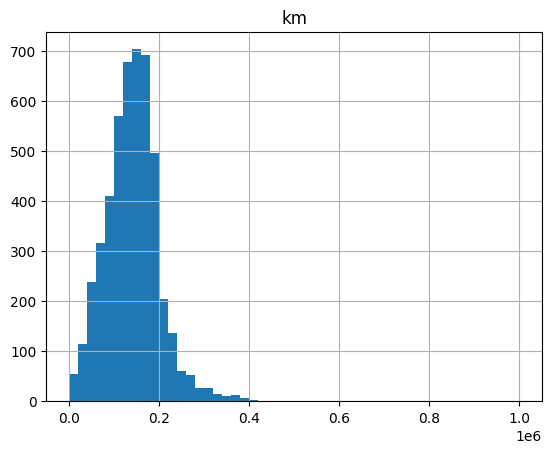

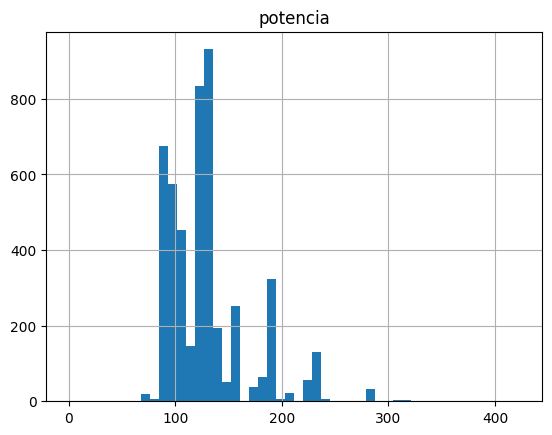

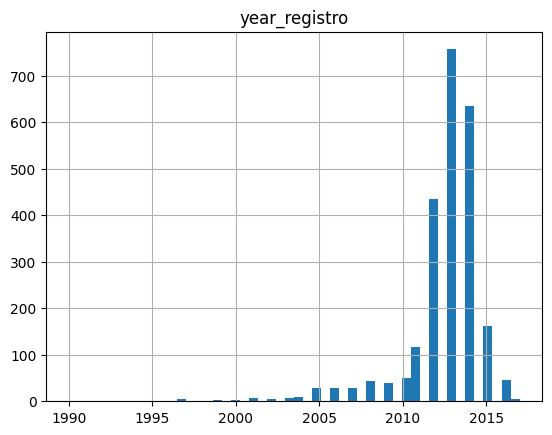

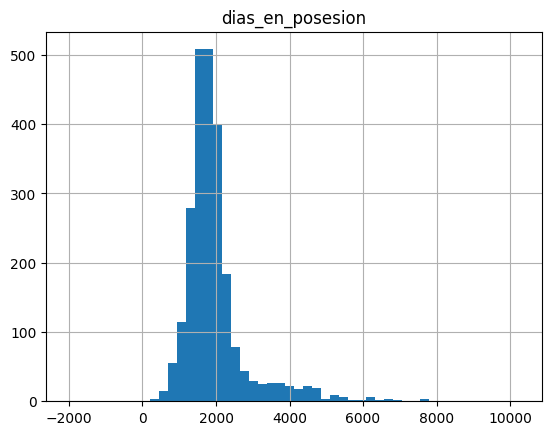

In [133]:
#Analyze the distribution of the numeric variables
for i in lista_numericas:
    df_bmw.hist(i, bins=50)

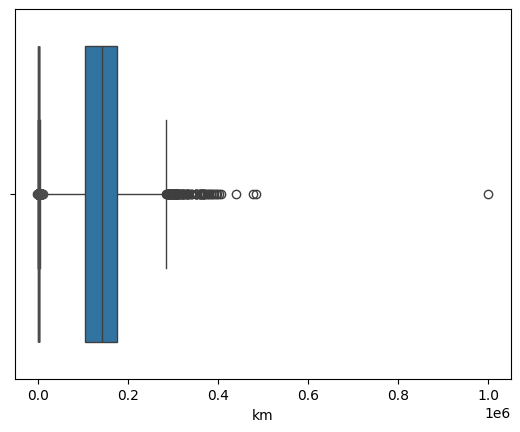

In [134]:
for i in lista_numericas:
    sns.boxplot(x = i, data = df_bmw)

In [135]:
#Analyze the distribution of the categoric variables
for i in lista_categoricas:
  print(df_bmw[i].value_counts())

modelo
320                 750
520                 632
otros               630
318                 567
X3                  438
116                 358
X1                  274
316                 234
X5                  231
525                 184
530                 157
118                 143
318 Gran Turismo     97
320 Gran Turismo     73
518                  66
Name: count, dtype: int64
tipo_gasolina
diesel    4630
petrol     191
otro        11
Name: count, dtype: int64
color
black     1498
grey      1069
blue       644
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64
tipo_coche
estate         1104
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            75
convertible      30
van              29
Name: count, dtype: int64


### 4. Remove outliers and Impute null values

In [136]:
df_bmw.describe()

,km,potencia,precio,year_registro,dias_en_posesion
count,4.835000e+03,4836.000000,4837.000000,2419.000000,2419.000000
mean,1.409664e+05,128.995037,15831.920612,2012.507234,1967.236875
std,6.022079e+04,39.011169,9222.630708,2.497859,923.034732
min,-6.400000e+01,0.000000,100.000000,1990.000000,-2009.000000
25%,1.028700e+05,100.000000,10800.000000,2012.000000,1489.000000
50%,1.410680e+05,120.000000,14200.000000,2013.000000,1767.000000
75%,1.752435e+05,135.000000,18600.000000,2014.000000,2130.000000
max,1.000376e+06,423.000000,178500.000000,2017.000000,10258.000000


#### 4.1 Remove outliers

In [137]:
# Remove those records where km < 0 and km >= 400000
df_bmw.drop(df_bmw[(df_bmw['km'] < 0) | (df_bmw['km']> 400000)].index, inplace=True)

In [138]:
# Remove those records where potencia <= 50
df_bmw.drop(df_bmw[df_bmw['potencia'] <= 50].index, inplace=True)

In [139]:
# Remove those records where precio < 500 and precio >70000
df_bmw.drop(df_bmw[(df_bmw['precio'] < 500) | (df_bmw['precio']>70000)].index, inplace=True)

In [140]:
# Check those records where dias_en_posesion <0
df_bmw[df_bmw['dias_en_posesion']<0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,year_registro,dias_en_posesion
100,320,342768.0,135.0,diesel,black,NaN,False,True,False,True,False,True,NaN,8200.0,2011.0,-609.0
256,316,201102.0,85.0,diesel,black,estate,True,NaN,False,False,False,True,False,8800.0,2013.0,-2009.0


In [141]:
df_bmw.drop(df_bmw[df_bmw['dias_en_posesion']<0].index, inplace=True)

#### 4.2 Impute null values

In [142]:
df_bmw.isnull().sum()

,0
modelo,3
km,2
potencia,1
tipo_gasolina,4
color,441
tipo_coche,1450
volante_regulable,4
aire_acondicionado,479
camara_trasera,2
elevalunas_electrico,2


In [143]:
#Null values
nulls = df_bmw.isnull().sum()
not_nulls = df_bmw.count()
resumen = pd.DataFrame({
    'Not Nulls': not_nulls,
    'Nulls': nulls,
    'Total': not_nulls + nulls
})
resumen['% Nulls'] = (resumen['Nulls'] / resumen['Total']) * 100
resumen = resumen[['Not Nulls', 'Nulls', 'Total', '% Nulls']]

resumen

,Not Nulls,Nulls,Total,% Nulls
modelo,4803,3,4806,0.062422
km,4804,2,4806,0.041615
potencia,4805,1,4806,0.020807
tipo_gasolina,4802,4,4806,0.083229
color,4365,441,4806,9.176030
tipo_coche,3356,1450,4806,30.170620
volante_regulable,4802,4,4806,0.083229
aire_acondicionado,4327,479,4806,9.966708
camara_trasera,4804,2,4806,0.041615
elevalunas_electrico,4804,2,4806,0.041615


In [144]:
#Remove those records where %Nulls < 1%

porcentaje_limite = 1
indices_a_eliminar = resumen[resumen['% Nulls'] < porcentaje_limite].index
df_bmw = df_bmw.dropna(subset=indices_a_eliminar)

In [145]:
df_bmw.isnull().sum()

,0
modelo,0
km,0
potencia,0
tipo_gasolina,0
color,439
tipo_coche,1442
volante_regulable,0
aire_acondicionado,477
camara_trasera,0
elevalunas_electrico,0


In [146]:
#Impute color values w/mode
df_bmw['color'].fillna(df_bmw['color'].mode()[0], inplace=True)

/tmp/ipython-input-1838966104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['color'].fillna(df_bmw['color'].mode()[0], inplace=True)


In [147]:
df_bmw['color'].value_counts()

,count
color,
black,1918
grey,1062
blue,636
white,479
brown,302
silver,288
red,46
beige,37
green,14


In [148]:
#Impute car type w/ the mode taking into account the car model
#Calculate the mode of car type for each model.
modas_por_modelo = df_bmw.groupby('modelo')['tipo_coche'].apply(lambda x: x.mode().iloc[0])

#Fill in the null records in the 'tipo_coche' column with the corresponding mode for their model.
for modelo, moda in modas_por_modelo.items():
    indices_nulos = df_bmw[(df_bmw['modelo'] == modelo) & (df_bmw['tipo_coche'].isnull())].index
    df_bmw.loc[indices_nulos, 'tipo_coche'] = moda

#Verify that there are no more null values in 'tipo_coche'."
print(df_bmw['tipo_coche'].isnull().sum())

0


In [149]:
#Impute air conditioning w/ the mode taking into account the car model
#Calculate the mode of car type for each model.
modas_por_modelo = df_bmw.groupby('modelo')['aire_acondicionado'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

#Fill in the null records w/ the mode
df_bmw['aire_acondicionado'] = df_bmw['aire_acondicionado'].fillna(modas_por_modelo)

print(df_bmw['aire_acondicionado'].isnull().sum())

0


/tmp/ipython-input-2922315922.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['aire_acondicionado'] = df_bmw['aire_acondicionado'].fillna(modas_por_modelo)


In [150]:
#Impute bluetooth w/ the mode taking into account the car model
#Calculate the mode of car type for each model.
modas_por_modelo = df_bmw.groupby('modelo')['bluetooth'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

#Fill in the null records w/ the mode
df_bmw['bluetooth'] = df_bmw['bluetooth'].fillna(modas_por_modelo)

print(df_bmw['bluetooth'].isnull().sum())


0


/tmp/ipython-input-1244120687.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['bluetooth'] = df_bmw['bluetooth'].fillna(modas_por_modelo)


In [151]:
#Impute alerta_lim_velocidad w/ the mode taking into account the car model
#Calculate the mode of car type for each model.
modas_por_modelo = df_bmw.groupby('modelo')['alerta_lim_velocidad'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

#Fill in the null records w/ the mode
df_bmw['alerta_lim_velocidad'] = df_bmw['alerta_lim_velocidad'].fillna(modas_por_modelo)

print(df_bmw['alerta_lim_velocidad'].isnull().sum())

0


/tmp/ipython-input-3178319780.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['alerta_lim_velocidad'] = df_bmw['alerta_lim_velocidad'].fillna(modas_por_modelo)


In [152]:
df_bmw['dias_en_posesion'].fillna(df_bmw['dias_en_posesion'].mean(), inplace=True)

/tmp/ipython-input-594734060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['dias_en_posesion'].fillna(df_bmw['dias_en_posesion'].mean(), inplace=True)


In [153]:
df_bmw['year_registro'].fillna(df_bmw['year_registro'].mean(), inplace=True)

/tmp/ipython-input-614394954.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['year_registro'].fillna(df_bmw['year_registro'].mean(), inplace=True)


In [154]:
df_bmw.isnull().sum()

,0
modelo,0
km,0
potencia,0
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0
camara_trasera,0
elevalunas_electrico,0


In [155]:
# Once all the nulls are filled, then transform the str True and False values to 0 and 1
def bool_to_int(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(bool).astype(int)

    return df


In [156]:
df_bmw = bool_to_int(df_bmw, ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps','alerta_lim_velocidad'])

In [157]:
df_bmw.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,year_registro,dias_en_posesion
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,2012.000000,2161.000000
1,otros,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2012.546482,1955.726968
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,2012.000000,2132.000000
3,otros,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,2012.546482,1955.726968
4,otros,97097.0,160.0,diesel,silver,hatchback,1,1,0,0,1,1,1,33400.0,2012.546482,1955.726968


In [158]:
# Change data type from float to integer in the date rows
df_bmw['year_registro']=pd.to_numeric(df_bmw['year_registro'], errors='coerce').astype(int)
df_bmw['dias_en_posesion']=pd.to_numeric(df_bmw['dias_en_posesion'], errors='coerce').astype(int)

In [159]:
df_bmw.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,year_registro,dias_en_posesion
0,118,140411.0,100.0,diesel,black,hatchback,1,1,0,1,0,1,0,11300.0,2012,2161
1,otros,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2012,1955
2,320,183297.0,120.0,diesel,white,estate,0,0,0,1,0,1,0,10200.0,2012,2132
3,otros,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,2012,1955
4,otros,97097.0,160.0,diesel,silver,hatchback,1,1,0,0,1,1,1,33400.0,2012,1955


In [160]:
df_bmw.describe()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,year_registro,dias_en_posesion
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000
mean,140357.739766,129.052840,0.551796,0.817460,0.201963,0.462615,0.206767,0.933584,0.560150,15786.633250,2012.272556,1955.362573
std,57796.937718,38.651285,0.497362,0.386329,0.401507,0.498652,0.405029,0.249034,0.496421,8492.381778,1.702019,616.887010
min,476.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,1990.000000,215.000000
25%,102831.500000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10900.000000,2012.000000,1767.000000
50%,140748.000000,120.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14200.000000,2012.000000,1955.000000
75%,175055.500000,135.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,18600.000000,2013.000000,1955.000000
max,398043.000000,412.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,69700.000000,2017.000000,10258.000000


In [161]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4788 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4788 non-null   object 
 1   km                    4788 non-null   float64
 2   potencia              4788 non-null   float64
 3   tipo_gasolina         4788 non-null   object 
 4   color                 4788 non-null   object 
 5   tipo_coche            4788 non-null   object 
 6   volante_regulable     4788 non-null   int64  
 7   aire_acondicionado    4788 non-null   int64  
 8   camara_trasera        4788 non-null   int64  
 9   elevalunas_electrico  4788 non-null   int64  
 10  bluetooth             4788 non-null   int64  
 11  gps                   4788 non-null   int64  
 12  alerta_lim_velocidad  4788 non-null   int64  
 13  precio                4788 non-null   float64
 14  year_registro         4788 non-null   int64  
 15  dias_en_posesion      4788

### Variables vs Target Analysis

In [162]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw)
lista_numericas, lista_boolean, lista_categoricas

(['km', 'potencia', 'year_registro', 'dias_en_posesion'],
 ['volante_regulable',
  'aire_acondicionado',
  'camara_trasera',
  'elevalunas_electrico',
  'bluetooth',
  'gps',
  'alerta_lim_velocidad'],
 ['modelo', 'tipo_gasolina', 'color', 'tipo_coche'])

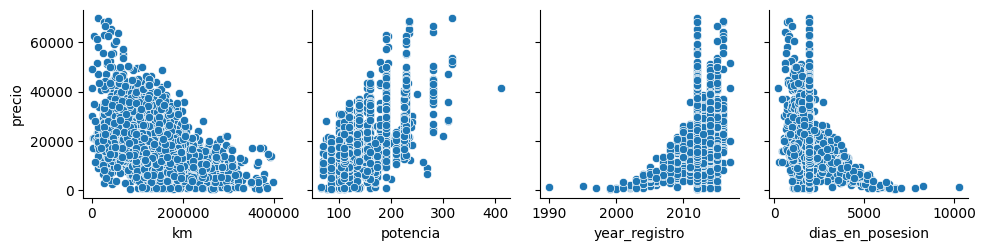

In [163]:
#Dispersion target-variable
sns.pairplot(df_bmw,x_vars=lista_numericas, y_vars=target)
plt.show()

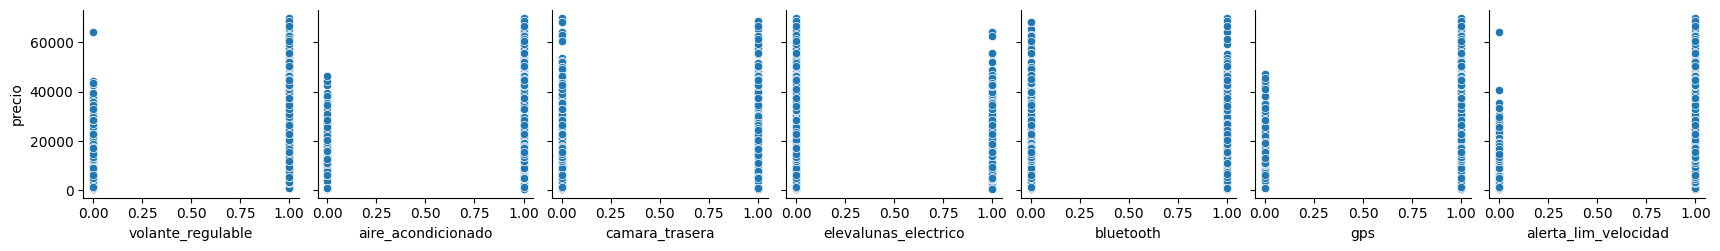

In [164]:
#Dispersion target-variable
sns.pairplot(df_bmw,x_vars=lista_boolean, y_vars=target)
plt.show()

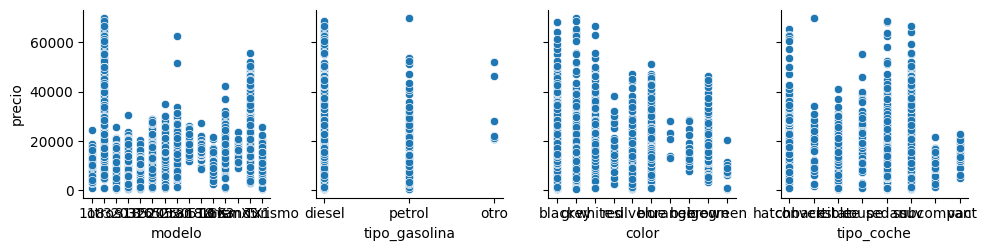

In [165]:
#Dispersion target-variable
sns.pairplot(df_bmw,x_vars=lista_categoricas, y_vars=target)
plt.show()

### 5. Correlation: Detecting if there are variables that explains the same

In [166]:
corr = df_bmw.corr(numeric_only = True)

In [167]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,year_registro,dias_en_posesion
km,1.000000,-0.035587,0.076152,0.029658,0.004839,0.054192,-0.030590,0.159420,-0.014264,-0.424707,-0.335311,0.339192
potencia,-0.035587,1.000000,0.325801,0.180333,0.312753,0.346142,0.205841,0.009219,0.509662,0.675894,0.052729,-0.055453
volante_regulable,0.076152,0.325801,1.000000,0.285138,0.254633,0.277766,0.124151,0.243661,0.243743,0.283077,-0.047897,0.054401
aire_acondicionado,0.029658,0.180333,0.285138,1.000000,0.144797,0.258435,0.101081,0.345134,0.203224,0.241904,0.137631,-0.135861
camara_trasera,0.004839,0.312753,0.254633,0.144797,1.000000,0.198923,0.125960,0.061056,0.196341,0.264961,-0.022793,0.022772
elevalunas_electrico,0.054192,0.346142,0.277766,0.258435,0.198923,1.000000,0.231698,0.200371,0.339471,0.286749,0.057913,-0.061302
bluetooth,-0.030590,0.205841,0.124151,0.101081,0.125960,0.231698,1.000000,0.115465,0.095014,0.203990,0.045506,-0.047696
gps,0.159420,0.009219,0.243661,0.345134,0.061056,0.200371,0.115465,1.000000,-0.050477,0.013270,-0.045503,0.053659
alerta_lim_velocidad,-0.014264,0.509662,0.243743,0.203224,0.196341,0.339471,0.095014,-0.050477,1.000000,0.458592,0.090244,-0.090647
precio,-0.424707,0.675894,0.283077,0.241904,0.264961,0.286749,0.203990,0.013270,0.458592,1.000000,0.328756,-0.328890


In [168]:
del(df_bmw['dias_en_posesion'])

In [169]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4788 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4788 non-null   object 
 1   km                    4788 non-null   float64
 2   potencia              4788 non-null   float64
 3   tipo_gasolina         4788 non-null   object 
 4   color                 4788 non-null   object 
 5   tipo_coche            4788 non-null   object 
 6   volante_regulable     4788 non-null   int64  
 7   aire_acondicionado    4788 non-null   int64  
 8   camara_trasera        4788 non-null   int64  
 9   elevalunas_electrico  4788 non-null   int64  
 10  bluetooth             4788 non-null   int64  
 11  gps                   4788 non-null   int64  
 12  alerta_lim_velocidad  4788 non-null   int64  
 13  precio                4788 non-null   float64
 14  year_registro         4788 non-null   int64  
dtypes: float64(3), int64(8), o

### Table normalization

In [170]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_bmw)

In [171]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [172]:
df_bmw=pd.get_dummies(data=df_bmw, columns=lista_categoricas)

In [173]:
df_bmw.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,1,0,1,0,11300.0,...,False,False,False,False,False,True,False,False,False,False
1,13929.0,317.0,1,1,0,0,1,1,1,69700.0,...,False,False,True,False,False,False,False,False,False,False
2,183297.0,120.0,0,0,0,1,0,1,0,10200.0,...,False,True,False,False,True,False,False,False,False,False
3,128035.0,135.0,1,1,0,1,1,1,1,25100.0,...,False,False,True,False,False,False,False,False,False,False
4,97097.0,160.0,1,1,0,0,1,1,1,33400.0,...,True,False,False,False,False,True,False,False,False,False


In [174]:
df_bmw.shape

(4788, 47)

In [175]:
# Once all the nulls are filled, then transform the str True and False values to 0 and 1
def get_bool_columns(df):
    bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
    return bool_columns

In [176]:
lista_boolean = get_bool_columns(df_bmw)

In [177]:
df_bmw = bool_to_int(df_bmw, lista_boolean)

In [178]:
df_bmw.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,...,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411.0,100.0,1,1,0,1,0,1,0,11300.0,...,0,0,0,0,0,1,0,0,0,0
1,13929.0,317.0,1,1,0,0,1,1,1,69700.0,...,0,0,1,0,0,0,0,0,0,0
2,183297.0,120.0,0,0,0,1,0,1,0,10200.0,...,0,1,0,0,1,0,0,0,0,0
3,128035.0,135.0,1,1,0,1,1,1,1,25100.0,...,0,0,1,0,0,0,0,0,0,0
4,97097.0,160.0,1,1,0,0,1,1,1,33400.0,...,1,0,0,0,0,1,0,0,0,0


In [179]:
lista_numericas

['km', 'potencia', 'year_registro']

In [180]:
minMaxResultado = MinMaxScaler()
for i in lista_numericas:
    df_bmw[i] = minMaxResultado.fit_transform(df_bmw[i].values.reshape(-1,1))

In [181]:
df_bmw.reset_index(drop=True, inplace=True)

In [182]:
target = 'precio'
features = df_bmw.columns[df_bmw.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_bmw[features]
y = df_bmw[target]

In [183]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.9)
highly_corr

/tmp/ipython-input-457210873.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
/tmp/ipython-input-457210873.py:20: SettingWit

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,tipo_gasolina_petrol,tipo_gasolina_diesel,0.978421,0.03626,0.022323,tipo_gasolina_diesel


In [184]:
del(df_bmw['tipo_gasolina_diesel'])

### Low Variance Columns

In [185]:
target = 'precio'
features = df_bmw.columns[df_bmw.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df_bmw[features]
y = df_bmw[target]

In [186]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 0.01)  # Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(X)

cols_lowvar = X.columns[vt.get_support() == False]
print(len(cols_lowvar), ' low variance features will be removed:\n', cols_lowvar.to_list())

X.drop(columns=cols_lowvar, inplace=True)
X.shape

8  low variance features will be removed:
 ['year_registro', 'tipo_gasolina_otro', 'color_beige', 'color_green', 'color_orange', 'color_red', 'tipo_coche_convertible', 'tipo_coche_van']


/tmp/ipython-input-2434426218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=cols_lowvar, inplace=True)


(4788, 37)

In [187]:
df_bmw=X.copy()

In [188]:
df_bmw.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,modelo_116,...,color_brown,color_grey,color_silver,color_white,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv
0,0.351978,0.098266,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.033838,0.725434,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0.459850,0.156069,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.320849,0.199422,1,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.243031,0.271676,1,1,0,0,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0


In [189]:
df_bmw.shape

(4788, 37)

In [190]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   km                       4788 non-null   float64
 1   potencia                 4788 non-null   float64
 2   volante_regulable        4788 non-null   int64  
 3   aire_acondicionado       4788 non-null   int64  
 4   camara_trasera           4788 non-null   int64  
 5   elevalunas_electrico     4788 non-null   int64  
 6   bluetooth                4788 non-null   int64  
 7   gps                      4788 non-null   int64  
 8   alerta_lim_velocidad     4788 non-null   int64  
 9   modelo_116               4788 non-null   int64  
 10  modelo_118               4788 non-null   int64  
 11  modelo_316               4788 non-null   int64  
 12  modelo_318               4788 non-null   int64  
 13  modelo_318 Gran Turismo  4788 non-null   int64  
 14  modelo_320              

In [193]:
df_bmw.head(50).to_excel('/content/drive/MyDrive/GIThUB/Case_1_EDA_Data_preparation_BMW/data-cleaning.ipynb.xlsx', index=False)